# Data Cleaning 

#### 1. Import pandas library.

In [1]:
import pandas as pd

#### 2. Import pymysql and sqlalchemy as you have learnt in the lesson of importing/exporting data. 


In [2]:
import pymysql
from sqlalchemy import create_engine

#### 3. Create a mysql engine to set the connection to the server. Check the connection details in [this link](https://relational.fit.cvut.cz/dataset/Stats).

In [3]:
#Loading Jupyter SQL extension
%load_ext sql
%config SqlMagic.autocommit = False

In [4]:
connection = pymysql.connect(host='relational.fit.cvut.cz', 
                user='guest', 
                password='relational', 
                database='stats', 
                port=3306)

#### 4. Import the users table.

In [5]:
sql= 'SELECT * FROM users;'
cursor=connection.cursor()
cursor.execute(sql)
users_table=pd.DataFrame(cursor.fetchall(), columns=['Id',
                                                     'Reputation',
                                                     'CreationDate',
                                                     'DisplayName',
                                                     'LastAccessDate',
                                                     'WebsiteUrl',
                                                     'Location',
                                                     'AboutMe',
                                                     'Views',
                                                     'UpVotes',
                                                     'DownVotes',
                                                     'AccountId',
                                                     'Age',
                                                     'ProfileImageUrl'])
users_table

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,Age,ProfileImageUrl
0,-1,1,2010-07-19 06:55:26,Community,2010-07-19 06:55:26,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,5007,1920,-1,NaN,None
1,2,101,2010-07-19 14:01:36,Geoff Dalgas,2013-11-12 22:07:23,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,25,3,0,2,37.0,None
2,3,101,2010-07-19 15:34:50,Jarrod Dixon,2014-08-08 06:42:58,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",22,19,0,3,35.0,None
3,4,101,2010-07-19 19:03:27,Emmett,2014-01-02 09:31:02,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,11,0,0,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,5,6792,2010-07-19 19:03:57,Shane,2014-08-13 00:23:47,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,1145,662,5,54503,35.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40320,55743,1,2014-09-13 21:03:50,AussieMeg,2014-09-13 21:18:52,None,None,None,0,0,0,5026902,NaN,http://graph.facebook.com/665821703/picture?ty...
40321,55744,6,2014-09-13 21:39:30,Mia Maria,2014-09-13 21:39:30,None,None,None,1,0,0,5026998,NaN,None
40322,55745,101,2014-09-13 23:45:27,tronbabylove,2014-09-13 23:45:27,None,United States,None,0,0,0,481766,NaN,https://www.gravatar.com/avatar/faa7a3fdbd8308...
40323,55746,106,2014-09-14 00:29:41,GPP,2014-09-14 02:05:17,None,None,"<p>Stats noobie, product, marketing &amp; medi...",1,0,0,976289,NaN,https://www.gravatar.com/avatar/6d9e9fa6b783a3...


#### 5. Rename Id column to userId.

In [6]:
users_table = users_table.rename(columns={'Id':'userId'})

users_table

,userId,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,Age,ProfileImageUrl
0,-1,1,2010-07-19 06:55:26,Community,2010-07-19 06:55:26,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,5007,1920,-1,NaN,None
1,2,101,2010-07-19 14:01:36,Geoff Dalgas,2013-11-12 22:07:23,http://stackoverflow.com,"Corvallis, OR",<p>Developer on the StackOverflow team. Find ...,25,3,0,2,37.0,None
2,3,101,2010-07-19 15:34:50,Jarrod Dixon,2014-08-08 06:42:58,http://stackoverflow.com,"New York, NY","<p><a href=""http://blog.stackoverflow.com/2009...",22,19,0,3,35.0,None
3,4,101,2010-07-19 19:03:27,Emmett,2014-01-02 09:31:02,http://minesweeperonline.com,"San Francisco, CA",<p>currently at a startup in SF</p>\n\n<p>form...,11,0,0,1998,28.0,http://i.stack.imgur.com/d1oHX.jpg
4,5,6792,2010-07-19 19:03:57,Shane,2014-08-13 00:23:47,http://www.statalgo.com,"New York, NY",<p>Quantitative researcher focusing on statist...,1145,662,5,54503,35.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40320,55743,1,2014-09-13 21:03:50,AussieMeg,2014-09-13 21:18:52,None,None,None,0,0,0,5026902,NaN,http://graph.facebook.com/665821703/picture?ty...
40321,55744,6,2014-09-13 21:39:30,Mia Maria,2014-09-13 21:39:30,None,None,None,1,0,0,5026998,NaN,None
40322,55745,101,2014-09-13 23:45:27,tronbabylove,2014-09-13 23:45:27,None,United States,None,0,0,0,481766,NaN,https://www.gravatar.com/avatar/faa7a3fdbd8308...
40323,55746,106,2014-09-14 00:29:41,GPP,2014-09-14 02:05:17,None,None,"<p>Stats noobie, product, marketing &amp; medi...",1,0,0,976289,NaN,https://www.gravatar.com/avatar/6d9e9fa6b783a3...


#### 6. Import the posts table. 

In [7]:
sql= 'SELECT * FROM posts;'
cursor=connection.cursor()
cursor.execute(sql)
posts_table=pd.DataFrame(cursor.fetchall(), columns=['Id',
                                                     'PostTypeId',
                                                     'AcceptedAnswerId',
                                                    'CreaionDate',
                                                    'Score',
                                                    'ViewCount',
                                                    'Body',
                                                    'OwnerUserId',
                                                    'LasActivityDate',
                                                    'Title',
                                                    'Tags',
                                                    'AnswerCount',
                                                    'CommentCount',
                                                    'FavoriteCount',
                                                    'LastEditorUserId',
                                                    'LasEditDate',
                                                    'CommunityOwnedDate',
                                                    'ParentId',
                                                    'ClosedDate',
                                                    'OwnerDisplayName',
                                                    'LastEditorDisplayName'])

In [8]:
posts_table

,Id,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LasEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91971,115374,2,NaN,2014-09-13 23:45:39,2,NaN,"<p>This grew too long for a comment, but I thi...",805.0,2014-09-14 02:05:41,None,...,NaN,2,NaN,805.0,2014-09-14 02:05:41,NaT,115367.0,NaT,None,None
91972,115375,1,NaN,2014-09-13 23:46:05,0,9.0,<p>Assume a classification problem where there...,49365.0,2014-09-14 02:09:23,Detecting a consistent pattern in a dataset vi...,...,1.0,0,NaN,NaN,NaT,NaT,NaN,NaT,None,None
91973,115376,1,NaN,2014-09-14 01:27:54,1,5.0,<p>My goal is to create a formula that can giv...,55746.0,2014-09-14 01:40:55,How to project video viewcount based on histor...,...,0.0,2,NaN,7290.0,2014-09-14 01:40:55,NaT,NaN,NaT,None,None
91974,115377,2,NaN,2014-09-14 02:03:28,0,NaN,<p>As a practical answer to the real questions...,805.0,2014-09-14 02:54:13,None,...,NaN,0,NaN,805.0,2014-09-14 02:54:13,NaT,115358.0,NaT,None,None


#### 7. Rename Id column to postId and OwnerUserId to userId.

In [9]:
posts_table = posts_table.rename(columns={'Id':'OwnerUserId'})

In [10]:
posts_table

,OwnerUserId,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,OwnerUserId,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LasEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91971,115374,2,NaN,2014-09-13 23:45:39,2,NaN,"<p>This grew too long for a comment, but I thi...",805.0,2014-09-14 02:05:41,None,...,NaN,2,NaN,805.0,2014-09-14 02:05:41,NaT,115367.0,NaT,None,None
91972,115375,1,NaN,2014-09-13 23:46:05,0,9.0,<p>Assume a classification problem where there...,49365.0,2014-09-14 02:09:23,Detecting a consistent pattern in a dataset vi...,...,1.0,0,NaN,NaN,NaT,NaT,NaN,NaT,None,None
91973,115376,1,NaN,2014-09-14 01:27:54,1,5.0,<p>My goal is to create a formula that can giv...,55746.0,2014-09-14 01:40:55,How to project video viewcount based on histor...,...,0.0,2,NaN,7290.0,2014-09-14 01:40:55,NaT,NaN,NaT,None,None
91974,115377,2,NaN,2014-09-14 02:03:28,0,NaN,<p>As a practical answer to the real questions...,805.0,2014-09-14 02:54:13,None,...,NaN,0,NaN,805.0,2014-09-14 02:54:13,NaT,115358.0,NaT,None,None


#### 8. Define new dataframes for users and posts with the following selected columns:
**users columns**: userId, Reputation, Views, UpVotes, DownVotes  
**posts columns**: postId, Score, userID, ViewCount, CommentCount

In [11]:
colnames2 = posts_table.columns.to_list()
colnames2[0] = 'postId'
colnames2[7] = 'userId'
posts_table.columns = colnames2

In [12]:
users_columns = ['userId', 'Reputation', 'Views', 'UpVotes', 'DownVotes']
posts_columns = ['postId', 'Score', 'userId', 'ViewCount', 'CommentCount']

In [13]:
users_df = pd.DataFrame(users_table[users_columns])
users_df

,userId,Reputation,Views,UpVotes,DownVotes
0,-1,1,0,5007,1920
1,2,101,25,3,0
2,3,101,22,19,0
3,4,101,11,0,0
4,5,6792,1145,662,5
...,...,...,...,...,...
40320,55743,1,0,0,0
40321,55744,6,1,0,0
40322,55745,101,0,0,0
40323,55746,106,1,0,0


In [14]:
posts_df = pd.DataFrame(posts_table[posts_columns])
posts_df

,postId,Score,userId,ViewCount,CommentCount
0,1,23,8.0,1278.0,1
1,2,22,24.0,8198.0,1
2,3,54,18.0,3613.0,4
3,4,13,23.0,5224.0,2
4,5,81,23.0,NaN,3
...,...,...,...,...,...
91971,115374,2,805.0,NaN,2
91972,115375,0,49365.0,9.0,0
91973,115376,1,55746.0,5.0,2
91974,115377,0,805.0,NaN,0


#### 9. Merge the new dataframes you have created, of users and posts. 
You will need to make an inner [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [15]:
#I use merfe method to do a join with the two dataframes. I use the column UserId as the index.
df_merged = posts_df.merge(users_df, on='userId')
df_merged

,postId,Score,userId,ViewCount,CommentCount,Reputation,Views,UpVotes,DownVotes
0,1,23,8.0,1278.0,1,6764,1089,604,25
1,16,16,8.0,NaN,3,6764,1089,604,25
2,36,41,8.0,67396.0,7,6764,1089,604,25
3,65,14,8.0,NaN,3,6764,1089,604,25
4,78,33,8.0,NaN,4,6764,1089,604,25
...,...,...,...,...,...,...,...,...,...
90579,115366,1,55742.0,17.0,0,6,0,0,0
90580,115370,1,55744.0,13.0,2,6,1,0,0
90581,115371,0,35801.0,19.0,0,1,1,0,0
90582,115375,0,49365.0,9.0,0,1,0,0,0


#### 10. How many missing values do you have in your merged dataframe? On which columns?

In [16]:
total_nulls = df_merged.isnull().sum().sum()
print(f'There is {total_nulls} missing values in df_merged.')

There is 48396 missing values in df_merged.


In [17]:
null_per_column = df_merged.isnull().sum()
filter_columns_null = df_merged.isnull().sum() > 0
columns_missing_values = dict(null_per_column[filter_columns_null])

for key, value in columns_missing_values.items():
    print(f'The columns that have missing values are: \n {key} with {value} missing values.')

The columns that have missing values are: 
 ViewCount with 48396 missing values.


#### 11. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before going to the next step.

In [18]:
#First I check the percentaje of missing values in each column.
null_per_column[filter_columns_null]/len(df_merged)*100

ViewCount    53.426654
dtype: float64

In [19]:
#I will visualize the not null values with an histogram in order to kwon that if there are real values and wich are them. 

<AxesSubplot:>

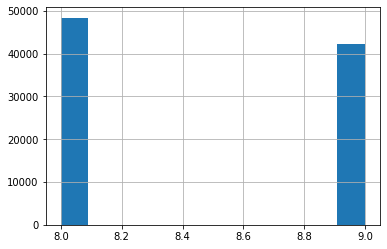

In [20]:
df_merged.notnull().sum(axis=1).hist(bins=11)

In [21]:
#As we only have 53% of the data in that column missed, I will filling them with a zero.
df_merged['ViewCount'] = df_merged['ViewCount'].fillna(0)
df_merged

,postId,Score,userId,ViewCount,CommentCount,Reputation,Views,UpVotes,DownVotes
0,1,23,8.0,1278.0,1,6764,1089,604,25
1,16,16,8.0,0.0,3,6764,1089,604,25
2,36,41,8.0,67396.0,7,6764,1089,604,25
3,65,14,8.0,0.0,3,6764,1089,604,25
4,78,33,8.0,0.0,4,6764,1089,604,25
...,...,...,...,...,...,...,...,...,...
90579,115366,1,55742.0,17.0,0,6,0,0,0
90580,115370,1,55744.0,13.0,2,6,1,0,0
90581,115371,0,35801.0,19.0,0,1,1,0,0
90582,115375,0,49365.0,9.0,0,1,0,0,0


In [22]:
#Then I check if this values are really a zero in all the columns.
df_merged.isnull().sum()

postId          0
Score           0
userId          0
ViewCount       0
CommentCount    0
Reputation      0
Views           0
UpVotes         0
DownVotes       0
dtype: int64

#### 12. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [23]:
#First, I check what data types are in each column of my Data frame. 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90584 entries, 0 to 90583
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   postId        90584 non-null  int64  
 1   Score         90584 non-null  int64  
 2   userId        90584 non-null  float64
 3   ViewCount     90584 non-null  float64
 4   CommentCount  90584 non-null  int64  
 5   Reputation    90584 non-null  int64  
 6   Views         90584 non-null  int64  
 7   UpVotes       90584 non-null  int64  
 8   DownVotes     90584 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 6.9 MB


In [27]:
#I will change floats to intergers in order everything has the same visual format and data type. 
#df_merged = df_merged.astype(int)
df_merged[['userId', 'ViewCount']] = df_merged[['userId', 'ViewCount']].astype(int)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90584 entries, 0 to 90583
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   postId        90584 non-null  int64
 1   Score         90584 non-null  int64
 2   userId        90584 non-null  int64
 3   ViewCount     90584 non-null  int64
 4   CommentCount  90584 non-null  int64
 5   Reputation    90584 non-null  int64
 6   Views         90584 non-null  int64
 7   UpVotes       90584 non-null  int64
 8   DownVotes     90584 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [30]:
#I use describe() method to see statistics about my dataframe.
stats = df_merged.describe().T

In [33]:
#We add a new column to know de IQR for each column.
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
postId,90584.0,56539.080522,33840.307529,1.0,26051.75,57225.5,86145.25,115378.0,60093.50
Score,90584.0,2.780767,4.948922,-19.0,1.00,2.0,3.00,192.0,2.00
userId,90584.0,16546.764727,15273.367108,-1.0,3437.00,11032.0,27700.00,55746.0,24263.00
ViewCount,90584.0,259.253400,1632.261405,0.0,0.00,0.0,111.00,175495.0,111.00
CommentCount,90584.0,1.894650,2.638704,0.0,0.00,1.0,3.00,45.0,3.00
Reputation,90584.0,6282.395412,15102.268670,1.0,60.00,396.0,4460.00,87393.0,4400.00
Views,90584.0,1034.245176,2880.074012,0.0,5.00,45.0,514.25,20932.0,509.25
UpVotes,90584.0,734.315718,2050.869327,0.0,1.00,22.0,283.00,11442.0,282.00
DownVotes,90584.0,33.273249,134.936435,0.0,0.00,0.0,8.00,1920.0,8.00


In [63]:
#We do a for loop in order to iterate each column and value and filter them with lower and upper limits. 
outliers = pd.DataFrame(columns=df_merged.columns)

for column in stats.index:
    
    iqr = stats.loc[column, 'IQR']
    q_25 = stats.loc[column, '25%']
    q_75 = stats.loc[column, '75%']
    
    lower = q_25 - 1.5 * iqr
    upper = q_75 + 1.5 * iqr
    
    filter_lower = df_merged[column] < lower
    filter_upper = df_merged[column] > upper
    
    results = df_merged[filter_upper | filter_lower].copy()
    results['outlier_col'] = column
    outliers = outliers.append(results)
    
    
outliers

,postId,Score,userId,ViewCount,CommentCount,Reputation,Views,UpVotes,DownVotes,outlier_col
0,1,23,8,1278,1,6764,1089,604,25,Score
1,16,16,8,0,3,6764,1089,604,25,Score
2,36,41,8,67396,7,6764,1089,604,25,Score
3,65,14,8,0,3,6764,1089,604,25,Score
4,78,33,8,0,4,6764,1089,604,25,Score
...,...,...,...,...,...,...,...,...,...,...
83637,100136,2,44451,0,0,1460,79,229,27,DownVotes
83638,101232,1,44451,0,0,1460,79,229,27,DownVotes
83639,101234,0,44451,0,0,1460,79,229,27,DownVotes
83640,102640,0,44451,0,0,1460,79,229,27,DownVotes


In [64]:
#we export the outliers table to a csv to your-code folder.
outliers.to_csv("data_cleaning_outliers.cvs")